<a href="https://colab.research.google.com/github/bpeel26/4YFN/blob/main/Nuwefruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [82]:
url = "https://raw.githubusercontent.com/bpeel26/4YFN/main/mwc22-client_table.csv"
client_table = pd.read_csv(url)
client_table

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0
...,...,...,...,...,...
35879,48345531,4,"12,5",150,1
35880,48345686,3,"37,5","112,5",1
35881,48365750,3,"41,67",125,1
35882,48365861,3,"62,58","125,17",1


In [38]:
client_table.dtypes

CLIENT ID                  int64
CLIENT_SEGMENT             int64
AVG CONSO                 object
AVG BASKET SIZE           object
RECEIVED_COMMUNICATION     int64
dtype: object

In [83]:
client_table["AVG CONSO"] = client_table["AVG CONSO"].str.replace(',','.')
client_table["AVG BASKET SIZE"] = client_table["AVG BASKET SIZE"].str.replace(',','.')
client_table

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350,0
2,24321880,3,46.67,112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0
...,...,...,...,...,...
35879,48345531,4,12.5,150,1
35880,48345686,3,37.5,112.5,1
35881,48365750,3,41.67,125,1
35882,48365861,3,62.58,125.17,1


In [84]:
client_table["AVG CONSO"] = client_table["AVG CONSO"].astype(float)
client_table["AVG BASKET SIZE"] = client_table["AVG BASKET SIZE"].astype(float)
client_table.dtypes

CLIENT ID                   int64
CLIENT_SEGMENT              int64
AVG CONSO                 float64
AVG BASKET SIZE           float64
RECEIVED_COMMUNICATION      int64
dtype: object

In [61]:
client_table.describe()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
count,3.588400e+04,35884.000000,35884.000000,35884.000000,35884.000000
mean,2.706058e+07,3.123593,64.534437,181.218610,0.507998
std,8.835076e+06,1.512932,64.381932,129.604691,0.499943
min,1.807311e+07,1.000000,0.830000,10.000000,0.000000
25%,2.053311e+07,2.000000,20.830000,100.000000,0.000000
50%,2.462190e+07,3.000000,50.000000,160.000000,1.000000
75%,3.298538e+07,4.000000,88.170000,225.000000,1.000000
max,4.836594e+07,6.000000,2433.330000,3400.200000,1.000000


In [96]:
from pandas.core.frame import DataFrame
#call the standard scaler 
std_scaler = StandardScaler()
 
#fit the values to the function 
Stand_Sc = std_scaler.fit_transform(client_table.iloc[:,range(0,5)].values)


array([[-0.30999688,  1.90124038,  0.04217955,  0.1584177 , -1.01612599],
       [-0.30998692, -0.74266943, -0.09637057,  1.30229655, -1.01612599],
       [-0.30998454, -0.08169198, -0.2774798 , -0.53408232, -1.01612599],
       ...,
       [ 2.41146392, -0.08169198, -0.35514242, -0.43377591,  0.98412993],
       [ 2.41147649, -0.08169198, -0.03035734, -0.43246421,  0.98412993],
       [ 2.41148543, -1.40364689,  0.38265249, -0.21881156,  0.98412993]])

In [ ]:
sns.boxplot(data = clien, orient = "h", palette = "Set2")

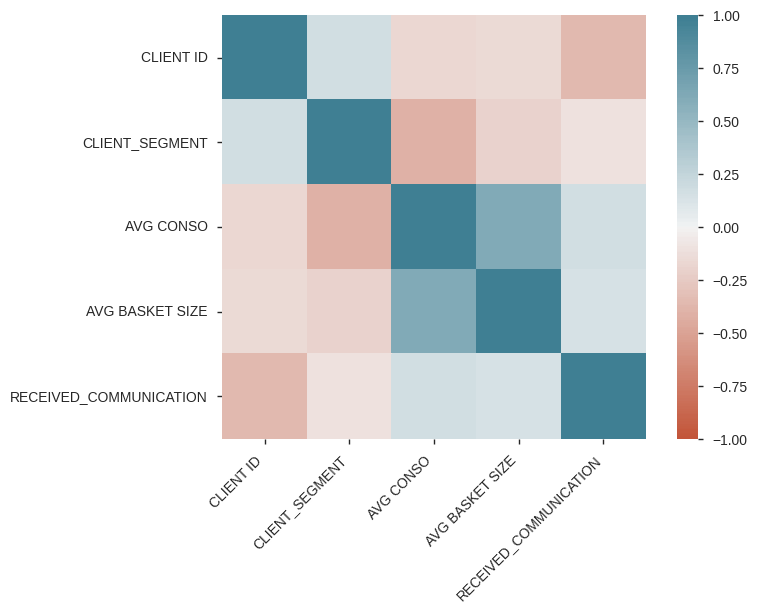

In [60]:
corr = client_table.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);